We start off by importing the packages and dataset into the program

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline

boston = pd.read_csv("/content/boston.csv")

We check the data by using head() and describe()

In [225]:
print(boston.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


We also see how many rows and columns i.e number of training rows and features there are in the dataset.

In [226]:
print("No. of features = ",len(boston.columns))
print("No. of training data = ",len(boston))

No. of features =  14
No. of training data =  506


In [227]:
print(boston.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

We then check if there are any NaN values or missing values in the dataset. If there are, we convert them to zero if it is low occurences or drop it if there are high occurences.

In [228]:
i=1
print("## | Column Name | Count")
print("------------------------")
for c in boston.columns:
  print(f"{i:02d}",c.ljust(11," "),boston[c].isna().sum(),sep=" | ")
  i+=1

## | Column Name | Count
------------------------
01 | CRIM        | 0
02 | ZN          | 0
03 | INDUS       | 0
04 | CHAS        | 0
05 | NOX         | 0
06 | RM          | 0
07 | AGE         | 0
08 | DIS         | 0
09 | RAD         | 0
10 | TAX         | 0
11 | PTRATIO     | 0
12 | B           | 0
13 | LSTAT       | 0
14 | MEDV        | 0


There are no NaN or other missing values in the data so we move on to the next step.

We now check how many 0s are there in the dataset.

In [229]:
i=1
print("## | Column Name | Count")
print("-------------------------")
for c in boston.columns:
  t=(boston[c]==0).sum()
  print(f"{i:02d}",c.ljust(11," "),t,sep=" | ")
  i+=1

## | Column Name | Count
-------------------------
01 | CRIM        | 0
02 | ZN          | 372
03 | INDUS       | 0
04 | CHAS        | 471
05 | NOX         | 0
06 | RM          | 0
07 | AGE         | 0
08 | DIS         | 0
09 | RAD         | 0
10 | TAX         | 0
11 | PTRATIO     | 0
12 | B           | 0
13 | LSTAT       | 0
14 | MEDV        | 0


We see that two columns ZN and CHAS are having significant number of zeroes.

However, ZN is **proportion of residential land zoned for lots over 25,000 sq.ft.** This data is allowed to have zeroes.

Similarly, CHAS is **Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)** This data too is allowed to have zeroes.

Since our entire data is continous numerical in range, there are no features that need encoding.

We next try to see if we can reduce the features in the datasset based on their correlation and variance

In [230]:
print(boston.var())

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
MEDV          84.586724
dtype: float64


The variance of all features are high enough that we can't exclude any of it.

In [231]:
corr_matrix = boston.corr()
corr_matrix.drop(['MEDV'],axis=0,inplace=True)
corr_matrix.drop(['MEDV'],axis=1,inplace=True)
corr_matrix[corr_matrix.abs()>0.8]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INDUS,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHAS,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RM,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
DIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
RAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.910228,NaN,NaN,NaN
TAX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910228,1.000000,NaN,NaN,NaN


TAX and RAD have high correlation so we drop RAD column

In [232]:
corr_matrix.drop(['RAD'],axis=0,inplace=True)
corr_matrix.drop(['RAD'],axis=1,inplace=True)
corr_matrix[corr_matrix.abs()>0.8]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
CRIM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INDUS,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHAS,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RM,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
AGE,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
DIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
TAX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
PTRATIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [233]:
boston.drop('RAD',axis=1,inplace=True)

We then check if there are any duplicate rows in the data

In [234]:
print("Number of duplicate rows: "+str(boston.duplicated().sum()))

Number of duplicate rows: 0


We then check for any outliers in the data

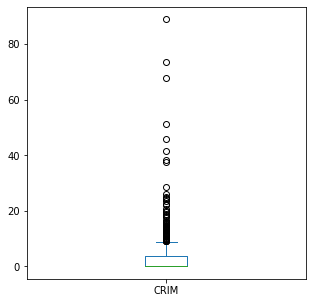

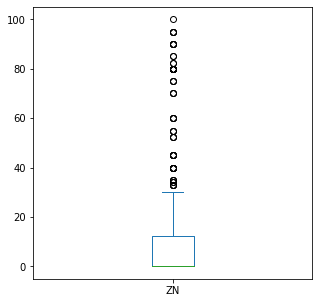

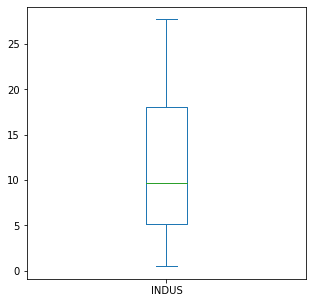

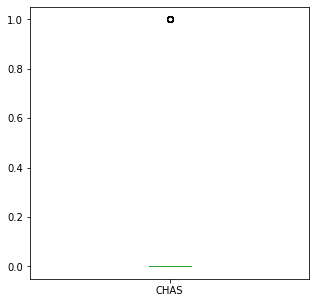

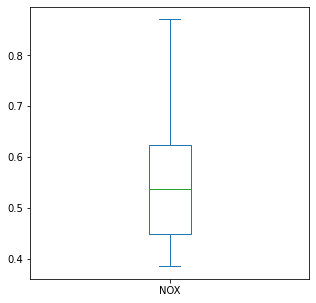

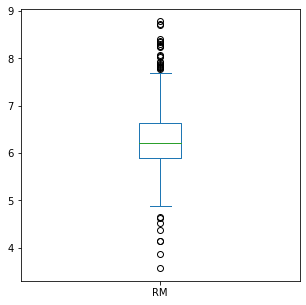

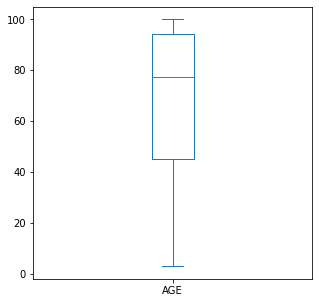

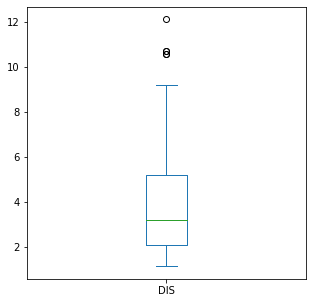

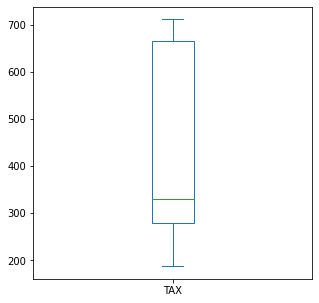

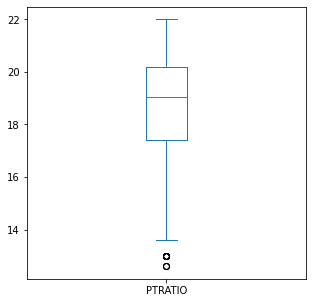

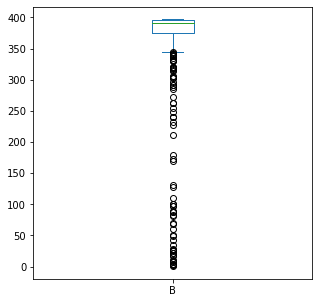

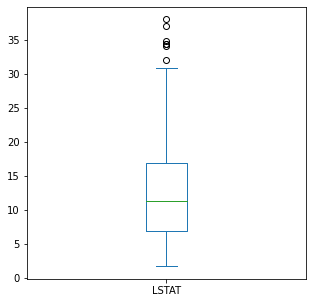

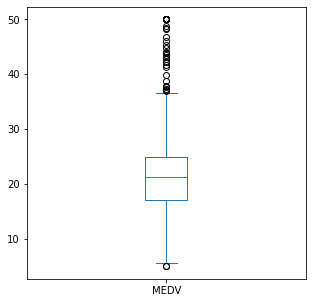

In [235]:
for c in boston.columns:
  boston[c].plot(kind='box',figsize=(5,5))
  plot.show()

Studying the box graphs, there really isn't any outlier data. There are a few data points that are extreme in CRIM but the distribution is more spread out rather than saying that it is an outlier

We now split the dataset into test and train sets

In [236]:
old_mean = boston.mean()
old_std = boston.std(ddof=0)
boston = (boston - old_mean)/old_std
boston_train = boston.loc[:355].copy(deep=True)
boston_test = boston.loc[356:].copy(deep=True)

We now run gradient descent for linear regression with the mean square error cost function to minimise theta

In [237]:
output_feature_train = boston_train['MEDV']
input_feature_train = boston_train.drop('MEDV',axis=1)

n=len(input_feature_train.columns) # number of features
m=len(input_feature_train.index)  # the number of training rows

X_train=np.ones(m)
#print(X.shape)
for c in input_feature_train.columns:
  X_r = input_feature_train[c].to_numpy()
  #print(X_r.shape)
  X_train=np.vstack([X_train,X_r])  #X0 to Xn are here
  #print(X.shape)
  #input()
#print(X.shape)

alpha = 0.006  # learning rate

theta = np.random.rand(n+1)
#print(theta.shape)

y_train = output_feature_train
#print(y.shape)

cost_list = []
cost_list.append(1e10) # starting off with a large value for the cost function. From here we will optimise down to minimum

iter = 0 # keeping track of iterations of gradient descent

run=True
while run:
  
  iter+=1

  # we are calculating prediction multiplying X and theta matrix 
  prediction = np.dot(theta, X_train)
  
  # we calculate the error that is the difference from the expected cost from prediction
  error = prediction - y_train

  # we then calculate the mean squared error
  cost = 1/(2*m) * np.dot(error, error.T)
  #print(cost)
  cost_list.append(cost) 

  theta = theta - (alpha * (1/m) * np.dot(error, X_train.T)) # simultaneous theta 0 to theta n update 
  
  changeInCost = cost_list[iter-1]-cost_list[iter] # change in cost between every iteration
  if changeInCost < 1e-9: # if the change is small enough then we say gradient descent has converged to the minima
    run=False # so we break out of the loop

dummy=cost_list.pop(0)
print(theta)

[ 0.27211178  1.01765239  0.03853014  0.02331004  0.02615803 -0.08629362
  0.70650092 -0.13457514 -0.19307656 -0.24962191 -0.1396039   0.14925515
 -0.08222672]


We then plot the change in cost as the gradient descent runs

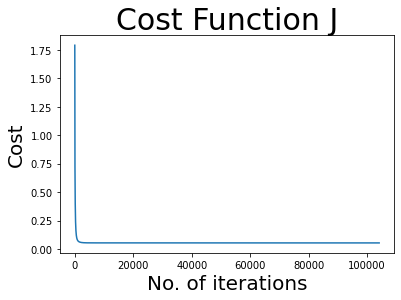

In [238]:
plot.title('Cost Function J', size = 30)
plot.xlabel('No. of iterations', size=20)
plot.ylabel('Cost', size=20)
plot.plot(cost_list)
plot.show()

We then calcuate the mean square error agaisnt the test data

In [239]:
output_feature_test = boston_train['MEDV']
input_feature_test = boston_train.drop('MEDV',axis=1)

n=len(input_feature_test.columns) # number of features
m=len(input_feature_test.index)  # the number of training rows

X_test=np.ones(m)
#print(X.shape)
for c in input_feature_test.columns:
  X_r = input_feature_test[c].to_numpy()
  #print(X_r.shape)
  X_test=np.vstack([X_test,X_r])  #X0 to Xn are here
  #print(X.shape)
  #input()
#print(X.shape)

predictions_test = np.dot(theta,X_test)
#print(predictions_test.shape)
error = output_feature_test - predictions_test
squared_error = np.dot(error,error.T)
mean_squared_error = squared_error/len(input_feature_test)
print(mean_squared_error)

0.10830378355073497


**Normal method**

Normal method depends on the matrix calcualtion for the system of quations that is theta, X and Y

we use the formula :

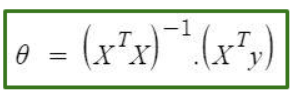

In [240]:
n=len(input_feature_train.columns) # number of features
m=len(input_feature_train.index)  # the number of training rows

X_train=np.ones(m)
#print(X.shape)
for c in input_feature_train.columns:
  X_r = input_feature_train[c].to_numpy()
  #print(X_r.shape)
  X_train=np.vstack([X_train,X_r])  #X0 to Xn are here
  #print(X.shape)
  #input()
#print(X.shape)

y_train = output_feature_train

XXT = np.matmul(X_train.T,X_train)

XXT_inv = np.linalg.pinv(XXT)

XXT_inv_XT = np.matmul(XXT_inv,X_train.T)

theta_normal = np.matmul(XXT_inv_XT.T,y_train.T)

print(theta_normal)

[ 0.35173238  1.25270212  0.0388231   0.02170659  0.02571973 -0.09869975
  0.70640041 -0.13452794 -0.19503272 -0.25264141 -0.13779777  0.15749332
 -0.08325713]


In [241]:
# let us compare the thetas that we have got
print(np.abs(theta-theta_normal))
# this is within the ball park of differences using partial inverse

[7.96205952e-02 2.35049729e-01 2.92955702e-04 1.60344496e-03
 4.38300632e-04 1.24061331e-02 1.00501752e-04 4.71974899e-05
 1.95615727e-03 3.01949507e-03 1.80613148e-03 8.23817320e-03
 1.03040928e-03]


Now calculating the mean squared error for normal method

In [242]:
n=len(input_feature_test.columns) # number of features
m=len(input_feature_test.index)  # the number of training rows

X_test=np.ones(m)
#print(X.shape)
for c in input_feature_test.columns:
  X_r = input_feature_test[c].to_numpy()
  #print(X_r.shape)
  X_test=np.vstack([X_test,X_r])  #X0 to Xn are here

y = output_feature_test

predictions_test = np.dot(theta_normal.T,X_test)

error = output_feature_test - predictions_test
squared_error = np.dot(error,error.T)
mean_squared_error = squared_error/len(input_feature_test)
print(mean_squared_error)

0.10820227217880918


The mean square error is almost identical as well

Moreover, compared to univariate the mean sqaured error has gone from ~0.437 to ~ 0.108 which is a sizeable improvement 